In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [155]:
kiva = pd.read_csv('~/dsi/Submissions/Projects/project-5-group-project-master/kivamix.csv')

In [156]:
kiva.shape

(419156, 35)

In [157]:
kivake = kiva[kiva['COUNTRY_CODE']=='KE']
kivake.shape

(51170, 35)

In [158]:
#Converting long text columns to length of words and count of characters
#Step1 is to replace nulls
kiva['DESCRIPTION_TRANSLATED'].fillna(' ', inplace=True)
kiva['TAGS'].fillna(' ', inplace=True)
kiva['LOAN_USE'].fillna(' ', inplace=True)


#Step 2 is to update new columns
def word_len_count(column):
    word_count = len(column.split())
    return word_count

def char_len_count(column):
    char_count = column.replace(' ','')
    char_count = len(char_count[:])
    return char_count

kiva['word_count_DT'] = kiva['DESCRIPTION_TRANSLATED'].apply(word_len_count)
kiva['word_count_TAGS'] = kiva['TAGS'].apply(word_len_count)
kiva['word_count_LU'] = kiva['LOAN_USE'].apply(word_len_count)

kiva['char_count_DT'] = kiva['DESCRIPTION_TRANSLATED'].apply(char_len_count)
kiva['char_count_TAGS'] = kiva['TAGS'].apply(char_len_count)
kiva['char_count_LU'] = kiva['LOAN_USE'].apply(char_len_count)


#Mark whether Image and Video was provided
kiva['IMAGE_ID'] = np.where(kiva['IMAGE_ID'].isnull(), 0, 1)
kiva['VIDEO_ID'] = np.where(kiva['VIDEO_ID'].isnull(), 0, 1)

## Parse out borrower genders & borrower pictured
kiva['FEM_COUNT'] = kiva['BORROWER_GENDERS'].str.count("female")
kiva['MALE_COUNT'] = kiva['BORROWER_GENDERS'].str.count("male")
kiva['PIC_TRUE_COUNT'] = kiva['BORROWER_PICTURED'].str.count("true")
kiva['PIC_FALSE_COUNT'] = kiva['BORROWER_PICTURED'].str.count("false")

kiva['ANY_FEM'] = kiva['BORROWER_GENDERS'].str.contains('female').map({True:1, False:0})
kiva['ANY_MALE'] = kiva['BORROWER_GENDERS'].str.contains('male').map({True:1, False:0})
kiva['month'] = kiva['POSTED_TIME'].str[5:7]

#Drop unrequired columns

kiva.drop(columns = ['DESCRIPTION_TRANSLATED', 'LOAN_USE', 'TAGS', 'DESCRIPTION','LOAN_ID','LOAN_NAME', 'FUNDED_AMOUNT',
                     'DESCRIPTION', 'TOWN_NAME', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'PLANNED_EXPIRATION_TIME',
                     'DISBURSE_TIME', 'POSTED_TIME', 'RAISED_TIME', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'BORROWER_NAMES',
                     'COUNTRY_NAME', 'CURRENCY_POLICY','year', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'IMAGE_ID', 'VIDEO_ID'], inplace=True)

In [159]:
kivake = kiva[kiva['COUNTRY_CODE']=='KE']
kivake.shape

(51170, 22)

In [144]:
# cond = kivake['ACTIVITY_NAME'].value_counts()
# threshold = 2000
# kivake['ACTIVITY_NAME'] = np.where(kivake['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), kivake['ACTIVITY_NAME'], 'misc_activity_name')

<ipython-input-144-3a105783a465>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kivake['ACTIVITY_NAME'] = np.where(kivake['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), kivake['ACTIVITY_NAME'], 'misc_activity_name')


In [145]:
# cond = kivake['COUNTRY_CODE'].value_counts()
# threshold = 2000
# kivake['COUNTRY_CODE'] = np.where(kivake['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), kivake['COUNTRY_CODE'], 'misc_country_code')

<ipython-input-145-6dff09e14fea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kivake['COUNTRY_CODE'] = np.where(kivake['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), kivake['COUNTRY_CODE'], 'misc_country_code')


In [146]:
kivake.columns

Index(['ORIGINAL_LANGUAGE', 'LOAN_AMOUNT', 'STATUS', 'ACTIVITY_NAME',
       'SECTOR_NAME', 'COUNTRY_CODE', 'LENDER_TERM', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'word_count_DT', 'word_count_TAGS',
       'word_count_LU', 'char_count_DT', 'char_count_TAGS', 'char_count_LU',
       'FEM_COUNT', 'MALE_COUNT', 'PIC_TRUE_COUNT', 'PIC_FALSE_COUNT',
       'ANY_FEM', 'ANY_MALE', 'month'],
      dtype='object')

In [153]:
kivake['ACTIVITY_NAME'].value_counts()

misc_activity_name    21277
Farming               19741
Cereals                2689
Dairy                  2669
General Store          2511
Agriculture            2283
Name: ACTIVITY_NAME, dtype: int64

In [174]:
kivake['ACTIVITY_NAME'].value_counts()

Farming                 19741
Cereals                  2689
Dairy                    2669
General Store            2511
Agriculture              2283
                        ...  
Computer                    1
Event Planning              1
Secretarial Services        1
Music Discs & Tapes         1
Machinery Rental            1
Name: ACTIVITY_NAME, Length: 139, dtype: int64

In [175]:
kivake['ACTIVITY_NAME'].unique()

array(['Farming', 'Poultry', 'Beauty Salon', 'Retail', 'Agriculture',
       'General Store', 'Tailoring', 'Clothing Sales', 'Food',
       'Motorcycle Transport', 'Dairy', 'Restaurant', 'Hotel',
       'Home Energy', 'Used Clothing', 'Charcoal Sales',
       'Primary/secondary school costs', 'Waste Management',
       'Fish Selling', 'Cosmetics Sales', 'Food Market',
       'Fruits & Vegetables', 'Timber Sales', 'Cereals', 'Taxi', 'Arts',
       'Grocery Store', 'Higher education costs', 'Energy', 'Food Stall',
       'Services', 'Butcher Shop', 'Beverages', 'Mobile Transactions',
       'Weaving', 'Fuel/Firewood', 'Bakery', 'Milk Sales', 'Construction',
       'Quarrying', 'Laundry', 'Cattle', 'Water Distribution',
       'Movie Tapes & DVDs', 'Farm Supplies', 'Metal Shop',
       'Personal Housing Expenses', 'Crafts', 'Vehicle Repairs',
       'Spare Parts', 'Clothing', 'Livestock', 'Home Appliances',
       'Wholesale', 'Veterinary Sales', 'Motorcycle Repair', 'Hardware',
       'E

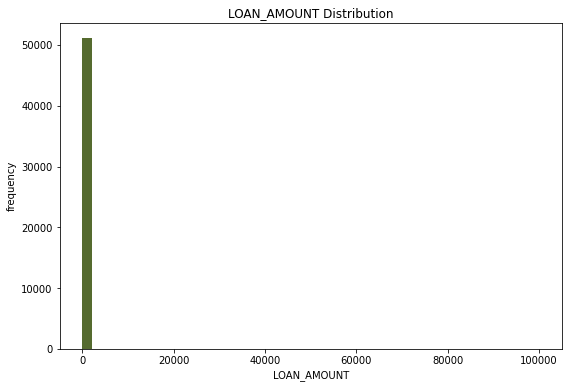

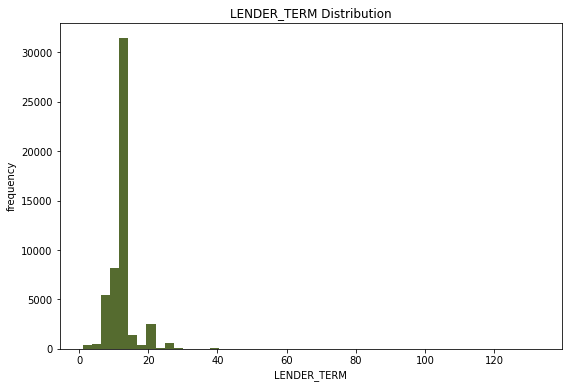

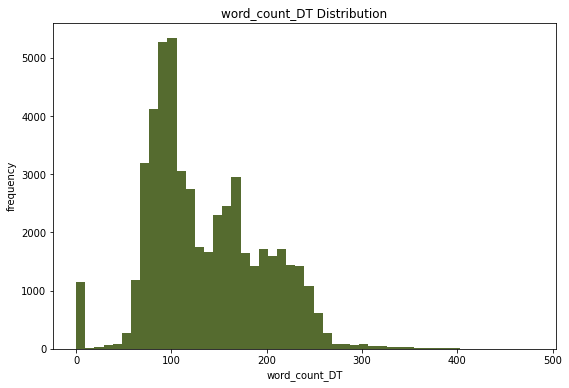

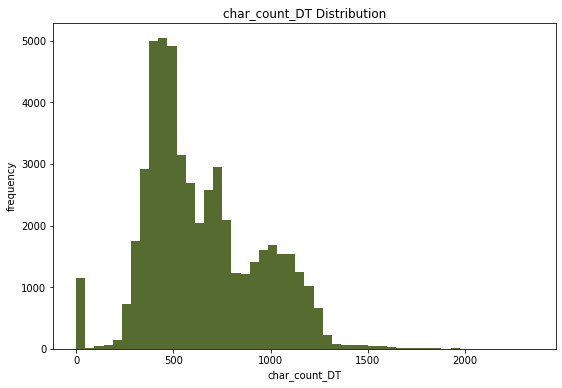

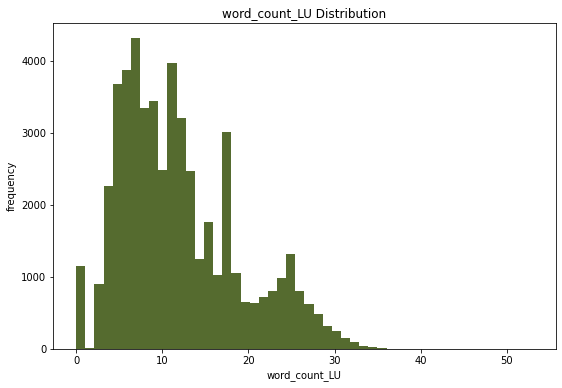

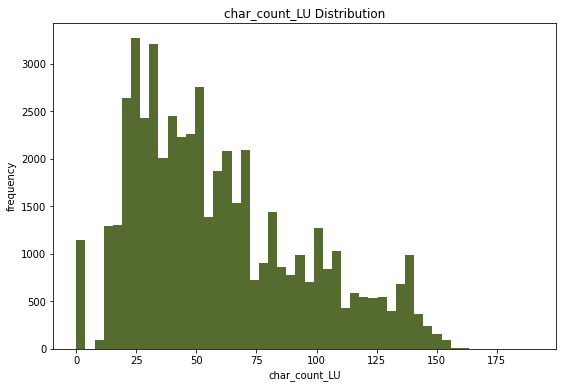

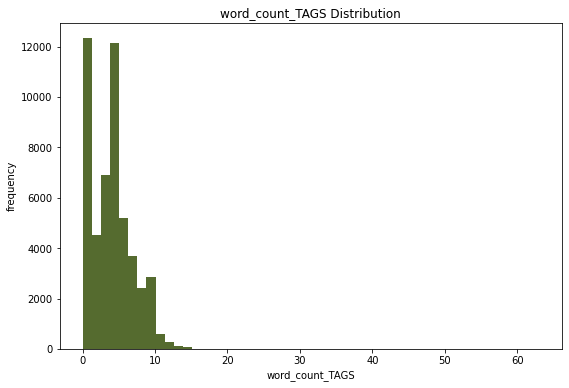

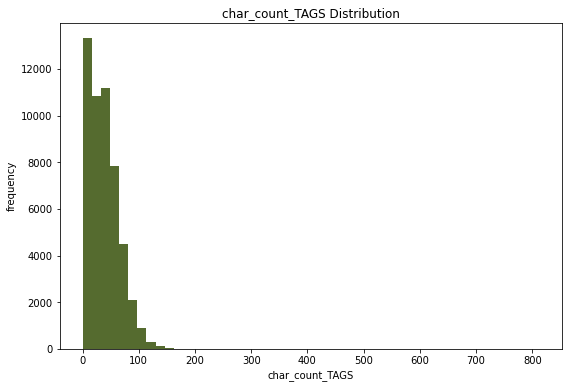

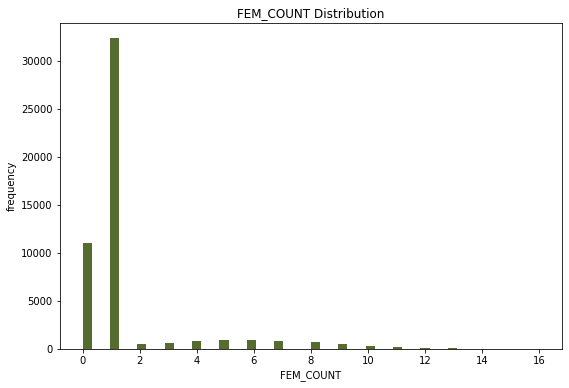

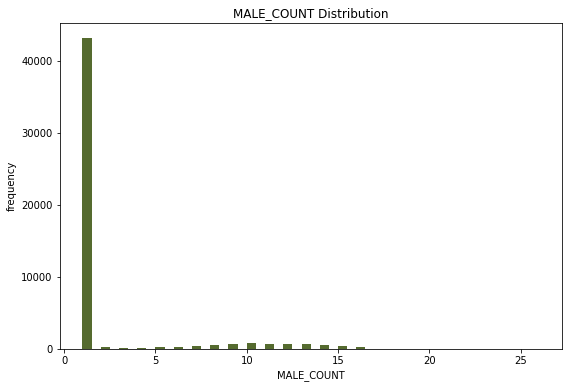

In [201]:
#Plotting histograms for numeric variables

def plot_hist(dataset, variable):
    plt.figure(figsize=(9,6))
    plt.hist(dataset[variable], bins=50,color='darkolivegreen')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} Distribution".format(variable))
    plt.show()
    
numericVar = ["LOAN_AMOUNT","LENDER_TERM","word_count_DT", "char_count_DT", "word_count_LU", "char_count_LU", "word_count_TAGS", "char_count_TAGS", "FEM_COUNT", "MALE_COUNT"]
for n in numericVar:
    plot_hist(kivake, n)

In [252]:
kivake[['LOAN_AMOUNT']]

,LOAN_AMOUNT
7,600.0
16,200.0
21,500.0
41,500.0
57,250.0
...,...
419104,500.0
419106,300.0
419117,300.0
419137,875.0


In [263]:
kivake = pd.DataFrame(kiva[kiva['COUNTRY_CODE']=='KE'])
kivake = kivake.reset_index(drop=True)

In [264]:
kivake.head()

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,char_count_DT,char_count_TAGS,char_count_LU,FEM_COUNT,MALE_COUNT,PIC_TRUE_COUNT,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE,month
0,English,600.0,1,Farming,Agriculture,KE,20.0,monthly,field_partner,208,...,936,7,109,1.0,1.0,1.0,0.0,1.0,1.0,07
1,English,200.0,1,Poultry,Agriculture,KE,11.0,monthly,field_partner,103,...,516,52,31,1.0,1.0,1.0,0.0,1.0,1.0,05
2,English,500.0,0,Beauty Salon,Services,KE,15.0,monthly,field_partner,74,...,331,42,36,1.0,1.0,1.0,0.0,1.0,1.0,08
3,English,500.0,1,Retail,Retail,KE,14.0,monthly,field_partner,108,...,541,36,56,1.0,1.0,1.0,0.0,1.0,1.0,08
4,English,250.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,220,...,1054,0,91,1.0,1.0,1.0,0.0,1.0,1.0,08


In [324]:
(kivake['LOAN_AMOUNT'].value_counts())>1000

500.0       True
300.0       True
200.0       True
400.0       True
100.0       True
           ...  
80000.0    False
2550.0     False
3475.0     False
36000.0    False
2200.0     False
Name: LOAN_AMOUNT, Length: 125, dtype: bool

In [342]:
x = kivake[kivake['LOAN_AMOUNT']<3000]
x.shape

(51131, 22)

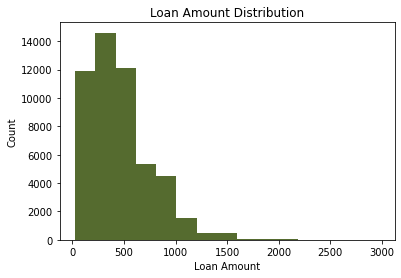

In [354]:
plt.hist(x=x["LOAN_AMOUNT"], color='darkolivegreen', bins=15)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution');

In [391]:
y = kivake[26>kivake['LENDER_TERM'] ]

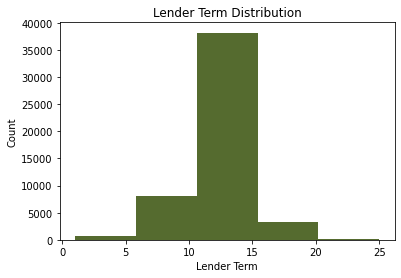

In [405]:
plt.hist(x=y['LENDER_TERM'], bins=5, color='darkolivegreen')
plt.xlabel('Lender Term')
plt.ylabel('Count')
plt.title('Lender Term Distribution');

In [407]:
kivake['LENDER_TERM'].value_counts()

14.0     26932
11.0      5769
8.0       4645
13.0      2986
20.0      2441
9.0       1674
12.0      1510
15.0      1003
7.0        776
10.0       767
26.0       533
16.0       393
3.0        380
17.0       319
5.0        235
6.0        223
21.0        81
19.0        55
40.0        46
24.0        43
2.0         42
39.0        32
28.0        31
4.0         28
27.0        24
72.0        23
18.0        23
33.0        20
25.0        18
31.0        15
49.0        12
22.0        11
73.0        11
32.0        10
29.0        10
41.0         9
23.0         7
45.0         4
121.0        4
133.0        3
110.0        3
38.0         3
1.0          2
37.0         2
122.0        2
50.0         2
43.0         2
62.0         2
47.0         1
46.0         1
60.0         1
36.0         1
Name: LENDER_TERM, dtype: int64

In [432]:
month_count = kivake['month'].value_counts()

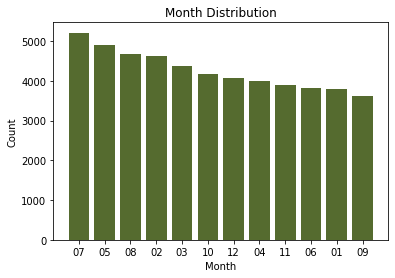

In [435]:
plt.bar(height=month_count, x=kivake['month'].unique(), color='darkolivegreen')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Distribution');

In [270]:
kivake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51170 entries, 0 to 51169
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGINAL_LANGUAGE   50026 non-null  object 
 1   LOAN_AMOUNT         51170 non-null  float64
 2   STATUS              51170 non-null  int64  
 3   ACTIVITY_NAME       51170 non-null  object 
 4   SECTOR_NAME         51170 non-null  object 
 5   COUNTRY_CODE        51170 non-null  object 
 6   LENDER_TERM         51170 non-null  float64
 7   REPAYMENT_INTERVAL  51170 non-null  object 
 8   DISTRIBUTION_MODEL  51170 non-null  object 
 9   word_count_DT       51170 non-null  int64  
 10  word_count_TAGS     51170 non-null  int64  
 11  word_count_LU       51170 non-null  int64  
 12  char_count_DT       51170 non-null  int64  
 13  char_count_TAGS     51170 non-null  int64  
 14  char_count_LU       51170 non-null  int64  
 15  FEM_COUNT           50026 non-null  float64
 16  MALE

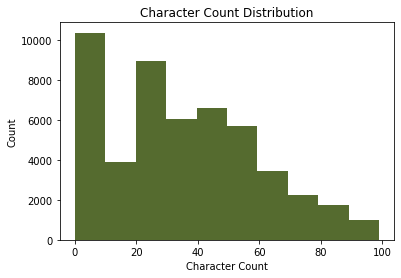

In [457]:
plt.hist(x = val_tags['char_count_TAGS'], color='darkolivegreen', bins=10)
plt.xlabel('Character Count')
plt.ylabel('Count')
plt.title('Character Count Distribution');

In [453]:
val_tags =kivake[ kivake['char_count_TAGS']<100]

In [466]:
kivake['ACTIVITY_NAME'].max()

'Wholesale'

In [470]:
kivake['ACTIVITY_NAME'].value_counts().head(10)

Farming                 19741
Cereals                  2689
Dairy                    2669
General Store            2511
Agriculture              2283
Home Energy              1786
Retail                   1628
Fruits & Vegetables      1532
Clothing Sales           1457
Motorcycle Transport     1417
Name: ACTIVITY_NAME, dtype: int64

In [476]:
kivake[kivake['ACTIVITY_NAME']=='Farming']

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,char_count_DT,char_count_TAGS,char_count_LU,FEM_COUNT,MALE_COUNT,PIC_TRUE_COUNT,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE,month
0,English,600.0,1,Farming,Agriculture,KE,20.0,monthly,field_partner,208,...,936,7,109,1.0,1.0,1.0,0.0,1.0,1.0,07
4,English,250.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,220,...,1054,0,91,1.0,1.0,1.0,0.0,1.0,1.0,08
5,English,200.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,97,...,456,13,98,0.0,1.0,1.0,0.0,0.0,1.0,02
10,English,750.0,1,Farming,Agriculture,KE,11.0,bullet,field_partner,167,...,735,57,92,1.0,7.0,7.0,0.0,1.0,1.0,02
17,English,200.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,208,...,1035,0,124,1.0,1.0,1.0,0.0,1.0,1.0,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51160,English,275.0,1,Farming,Agriculture,KE,11.0,bullet,field_partner,151,...,730,71,42,2.0,5.0,5.0,0.0,1.0,1.0,12
51161,English,575.0,1,Farming,Agriculture,KE,11.0,bullet,field_partner,174,...,802,56,72,7.0,9.0,9.0,0.0,1.0,1.0,01
51165,English,500.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,170,...,837,28,133,1.0,1.0,1.0,0.0,1.0,1.0,09
51168,English,875.0,0,Farming,Agriculture,KE,11.0,bullet,field_partner,173,...,789,105,66,4.0,11.0,11.0,0.0,1.0,1.0,01
